In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, func

In [7]:
import numpy as np
import pandas as pd

In [8]:
import datetime


# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
# ?????

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [109]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
earliest_date = datetime.datetime.strptime(last_date.date, '%Y-%m-%d')
earliest_date = earliest_date - datetime.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip =  pd.DataFrame(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= earliest_date)).dropna() 
            #.filter(Measurement.prcp > 0))

# Save the query results as a Pandas DataFrame and set the index to the date column
precip = precip.set_index('date')
precip = precip.groupby('date').max()

# Sort the dataframe by date
precip = precip.sort_index(ascending=True)
#print(precip)

            prcp
date            
2016-08-24  2.28
2016-08-25  0.21
2016-08-26  0.04
2016-08-27  0.18
2016-08-28  2.07
...          ...
2017-08-19  0.09
2017-08-20  0.01
2017-08-21  0.56
2017-08-22  0.50
2017-08-23  0.45

[365 rows x 1 columns]


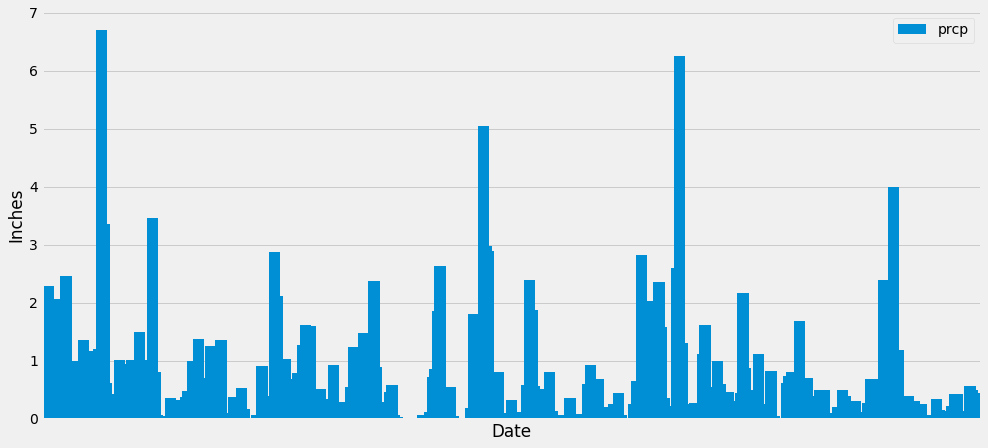

0.5172876712328772
0.25
0    0.0
dtype: float64


In [150]:
# Use Pandas Plotting with Matplotlib to plot the data
precip.plot(kind="bar",legend = True, width = 4.5,figsize=(15,7))

plt.xlabel("Date")
plt.ylabel("Inches")

plt.xticks([])
plt.savefig('precip.png')
plt.show()

# Print Summary Statistics
print(precip['prcp'].mean())
print(precip['prcp'].median())
print(precip['prcp'].mode())

In [56]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [124]:
# Join data into single dataframe
station_measure_df = pd.DataFrame(session.query(Measurement.station, Measurement.date,Measurement.prcp,Measurement.tobs,
                                                Station.name,Station.latitude,Station.longitude,Station.elevation)
                                                  .filter(Measurement.station == Station.station)).dropna()

# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_measure_count = station_measure_df.groupby("station", as_index=False).count()
station_measure_count = station_measure_count.sort_values('name', ascending=False) 
station_measure_count.rename(columns = {'name':'count'}, inplace = True) 
station_measure_count[['station','count']]


18103


,station,count
6,USC00519281,2772
1,USC00513117,2696
7,USC00519397,2685
8,USC00519523,2572
3,USC00516128,2484
2,USC00514830,1937
0,USC00511918,1932
4,USC00517948,683
5,USC00518838,342


In [90]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
print(station_measure_df[station_measure_df["station"]=="USC00519281"].tobs.min())
print(station_measure_df[station_measure_df["station"]=="USC00519281"].tobs.max())
print(station_measure_df[station_measure_df["station"]=="USC00519281"].tobs.mean())

54.0
85.0
71.66378066378067


In [167]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the data and tobs scores
temp_last_date = session.query(Measurement.date).filter(Measurement.station == "USC00519281").order_by(Measurement.date.desc()).first()
temp_earliest_date = datetime.datetime.strptime(temp_last_date.date, '%Y-%m-%d')
temp_earliest_date = temp_earliest_date - datetime.timedelta(days=365)
temp =  pd.DataFrame(session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= temp_earliest_date))



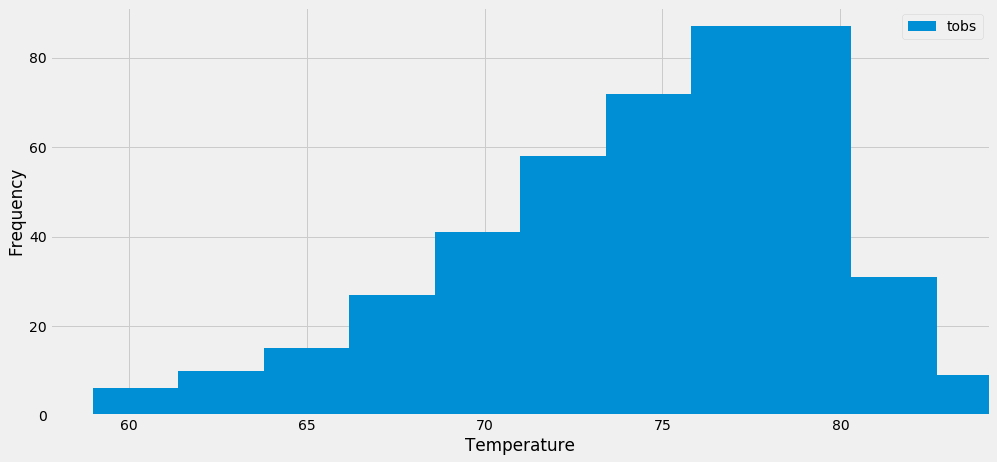

In [168]:
# Create Histogram
temp.plot(kind="hist",legend = True, width = 4.5,figsize=(15,7))
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Save Histrogram
plt.savefig('temp.png')
#plt.show()


## Bonus Challenge Assignment

In [67]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [152]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
